<a href="https://colab.research.google.com/github/franceschinii/EXEMPLO_BI_DATA-WAREHOUSE_DATA-LAKE/blob/main/EXERCICIO_DATAWAREHOUSE_DATALAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Preparando uma coleção de 600 produtos com nomes e categorias fictícias.
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Criando um DataFrame para armazenar os produtos.
df_produtos = pd.DataFrame(produtos)

# Gerando uma série de 1000 vendas fictícias, incluindo datas, IDs de produtos, quantidades e valores totais.
num_vendas = 1000
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame para armazenar as vendas.
df_vendas = pd.DataFrame(data_vendas)

# Salvando os dados de produtos e vendas em arquivos CSV separados.
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Carregando os dados de produtos e vendas dos arquivos CSV salvos.
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Combinando os dados de vendas e produtos em um único DataFrame.
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Exportando os dados combinados para um arquivo CSV de um data warehouse.
df_merge.to_csv('data_warehouse.csv', index=False)

# Carregando os dados do data warehouse e exibindo-os.
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse")
print(df_warehouse)


Conteúdo do Data Warehouse
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-18         394         121         4105  Produto 394       Roupas
1    2024-04-20         394          75         2675  Produto 394       Roupas
2    2024-04-13         412          92         4492  Produto 412  Eletrônicos
3    2024-04-21         412          87         3487  Produto 412  Eletrônicos
4    2024-04-01         259         104         1438  Produto 259       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-13         286         122         6915  Produto 286       Roupas
996  2024-04-17         212         100         2714  Produto 212       Roupas
997  2024-04-17         574          90         2323  Produto 574  Eletrônicos
998  2024-04-04         115         124         3082  Produto 115    Alimentos
999  2024-04-07         187          98         3890  Produto 187       Roupas

[1000 rows x 6 columns]


Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1            53         6255
Produto 10          290        14328
Produto 101         317        17439
Produto 102         130        13680
Produto 105         459        22752
...                 ...          ...
Produto 94          292        14664
Produto 95           73         6689
Produto 96          141         4880
Produto 97          157         1982
Produto 98          234        11122

[492 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         46257      1964015
Eletrônicos       42227      1901526
Roupas            36697      1621265

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4495       183219
2024-04-02        3482       169403
2024-04-03        3733       181121
2024-04-04        41

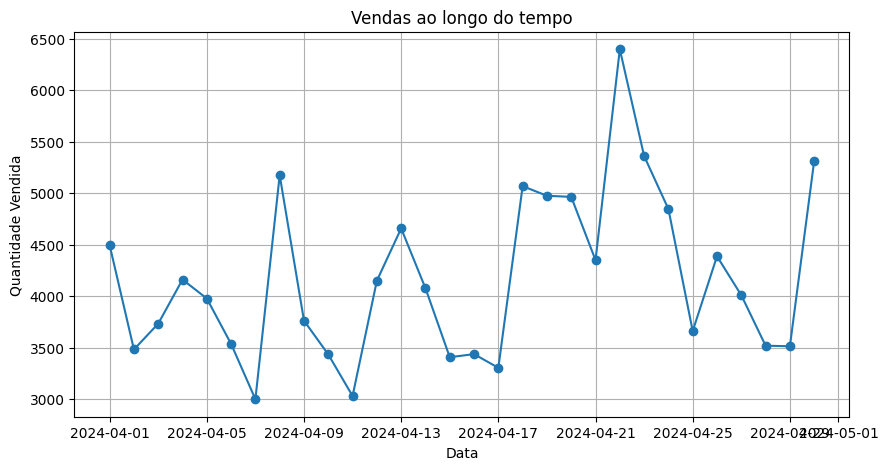


Análise de desempenho de produtos:
nome
Produto 1       6255
Produto 10     14328
Produto 101    17439
Produto 102    13680
Produto 105    22752
               ...  
Produto 94     14664
Produto 95      6689
Produto 96      4880
Produto 97      1982
Produto 98     11122
Name: valor_total, Length: 492, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do arquivo "data_warehouse.csv" em um DataFrame.
df_warehouse = pd.read_csv('data_warehouse.csv')

# Realizando uma análise de vendas por produto: agrupando por nome e somando quantidade e valor total.
vendas_por_produto = df_warehouse.groupby('nome') [['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Realizando uma análise de vendas por categoria de produto: agrupando por categoria e somando quantidade e valor total.
vendas_por_categoria = df_warehouse.groupby('categoria') [['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna de data para o formato datetime e realizando uma análise de tendências temporais: agrupando por data e somando quantidade e valor total.
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data') [['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Criando um gráfico de vendas ao longo do tempo com base nos dados da variável "vendas_por_data".
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Realizando uma análise de desempenho de produtos: agrupando por nome e somando o valor total das vendas.
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)


In [3]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

# Verifica se a pasta "data_lake" existe e, se não existir, cria a pasta.
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos e o número de linhas por arquivo.
num_files = 10
num_rows_per_file = 1000

# Inicializa uma lista vazia para armazenar os DataFrames.
dfs = []

# Loop para gerar dados aleatórios e salvar em arquivos CSV.
for i in range(num_files):
    # Gera dados aleatórios para as colunas 1, 2 e 3.
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame com os dados gerados aleatoriamente.
    df = pd.DataFrame(data)

    # Salva o DataFrame em um arquivo CSV na pasta "data_lake".
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Adiciona o DataFrame à lista de DataFrames.
    dfs.append(df)

print("Dados do Data Lake gerados com sucesso!")

# Cria um banco de dados SQLite chamado 'data_lake.db' e salva os DataFrames como tabelas dentro deste banco de dados.
conn_string = 'sqlite:///data_lake.db'  # String de conexão para o banco de dados SQLite.

# Cria uma conexão com o banco de dados.
engine = create_engine(conn_string)

# Salva cada DataFrame como uma tabela no banco de dados SQLite, usando índices para garantir nomes únicos.
for i, df in enumerate(dfs, 1):
    table_name = f'dados_{i}'  # Nome da tabela.
    df.to_sql(table_name, engine, index=False)  # Salva o DataFrame como uma tabela no banco de dados.


Dados do Data Lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       23  0.854490       B
1       90 -0.759208       C
2       37  0.818065       A
3       95 -0.451111       B
4       11 -1.003697       C

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     48.042000    -0.006811
std      28.796901     1.023284
min       0.000000    -3.321754
25%      23.000000    -0.709556
50%      47.000000    -0.001522
75%      72.000000     0.654388
max      99.000000     3.606476


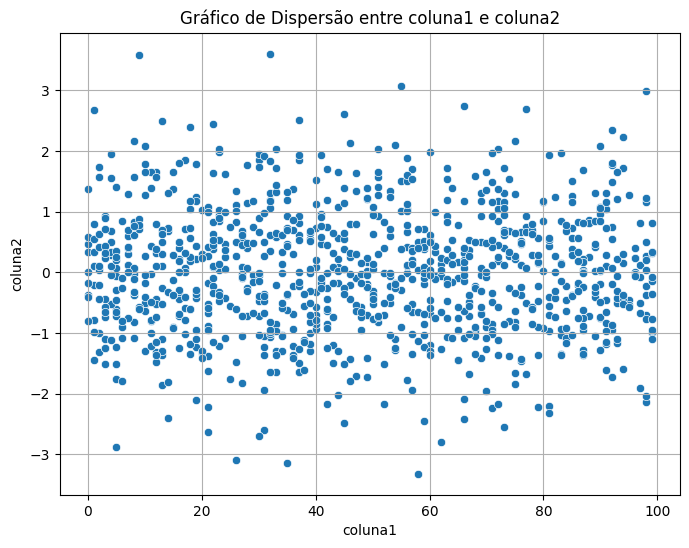

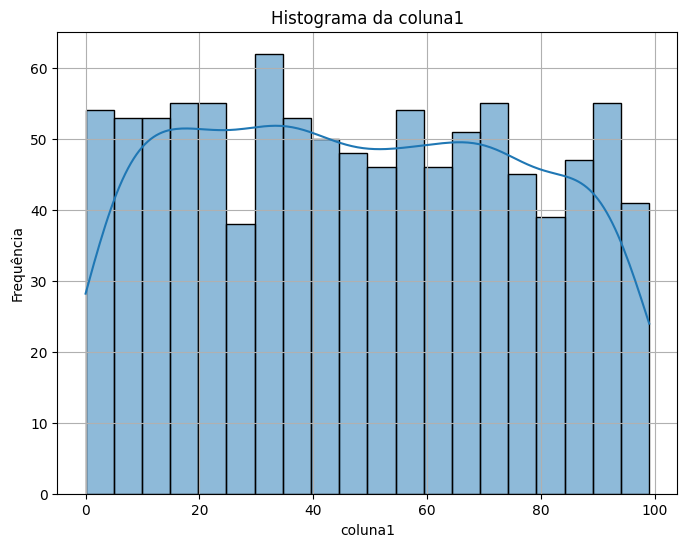

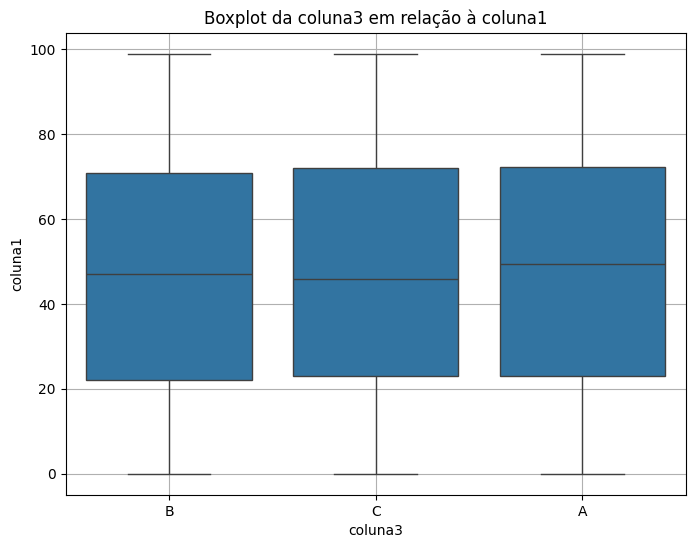

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Estabelece uma conexão com o banco de dados 'data_lake.db'.
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carrega os dados da tabela "dados_1" em um DataFrame.
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Exibe as primeiras linhas do DataFrame.
print("Primeiras linhas do DataFrame:")
print(df.head())

# Exibe informações sobre o DataFrame, incluindo tipos de dados e valores ausentes.
print("\nInformações sobre o DataFrame:")
print(df.info())

# Exibe um resumo estatístico dos dados contidos no DataFrame.
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Plota três visualizações gráficas baseadas nas colunas do DataFrame.

# Gráfico de Dispersão entre coluna1 e coluna2.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Histograma da coluna1.
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Boxplot da coluna3 em relação à coluna1.
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
